In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('shopping_behavior.csv')
print("Датасет успешно загружен.")

print("Первые 5 строк:")
print(df.head())

print("Последние 5 строк:")
print(df.tail())

print("Структура данных (shape):")
print(df.shape)
print(f"Количество строк: {df.shape[0]}, Количество столбцов: {df.shape[1]}")

print("Информация о датасете (типы данных и пропуски):")
df.info()

Датасет успешно загружен.
Первые 5 строк:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Ty

In [8]:
missing_values = df.isnull().sum()

print("Пропущенные значения по столбцам:")
print(missing_values[missing_values > 0])
print(f"Общее количество пропусков: {missing_values.sum()}")
duplicate_rows = df.duplicated().sum()
print(f"Количество дублирующихся строк: {duplicate_rows}")
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)

Пропущенные значения по столбцам:
Series([], dtype: int64)
Общее количество пропусков: 0
Количество дублирующихся строк: 0


Поиск выбросов с помощью Z-Score:
Столбец'Purchase Amount (USD)':Найдено0
Столбец'Previous Purchases':Найдено0
Столбец'Age':Найдено0
Столбец'Review Rating':Найдено0


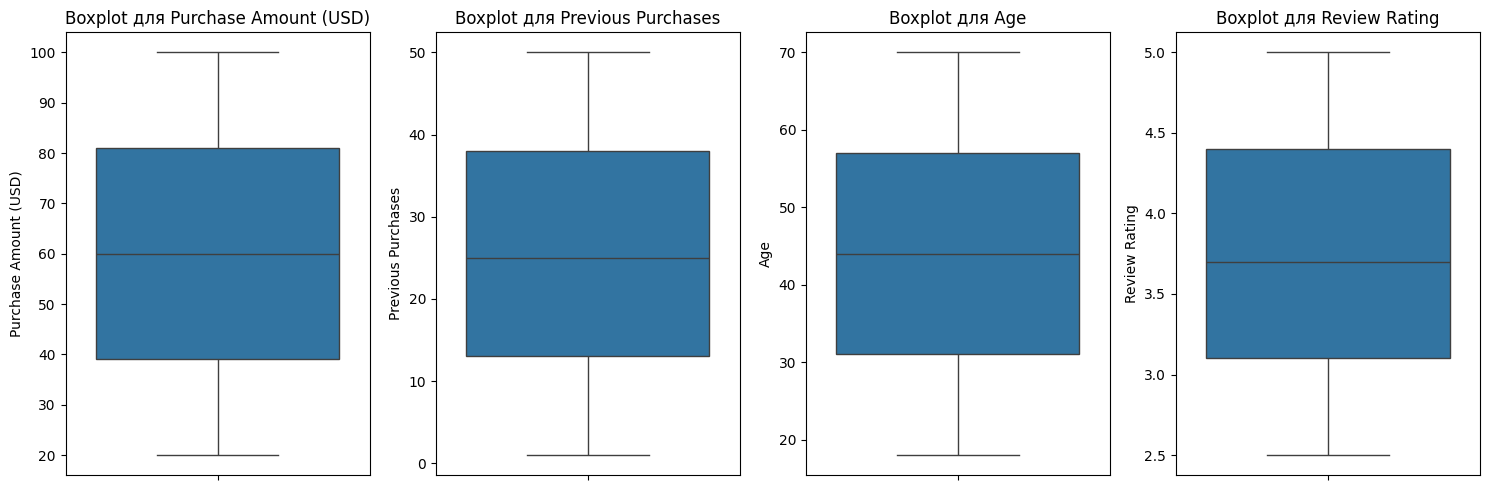

In [10]:
numeric_cols = ['Purchase Amount (USD)', 'Previous Purchases', 'Age', 'Review Rating']
print("Поиск выбросов с помощью Z-Score:")
for col in numeric_cols:
    z_scores = (df[col]-df[col].mean()) / df[col].std()
    outliers = df[np.abs(z_scores) > 3]
    print(f"Столбец'{col}':Найдено{len(outliers)}")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot для {col}')
plt.tight_layout()
plt.show()

In [11]:
print(df[numeric_cols].describe())
print(df['Category'].value_counts())
print(df['Payment Method'].value_counts())
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

       Purchase Amount (USD)  Previous Purchases          Age  Review Rating
count            3900.000000         3900.000000  3900.000000    3900.000000
mean               59.764359           25.351538    44.068462       3.749949
std                23.685392           14.447125    15.207589       0.716223
min                20.000000            1.000000    18.000000       2.500000
25%                39.000000           13.000000    31.000000       3.100000
50%                60.000000           25.000000    44.000000       3.700000
75%                81.000000           38.000000    57.000000       4.400000
max               100.000000           50.000000    70.000000       5.000000
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64
                       Pu

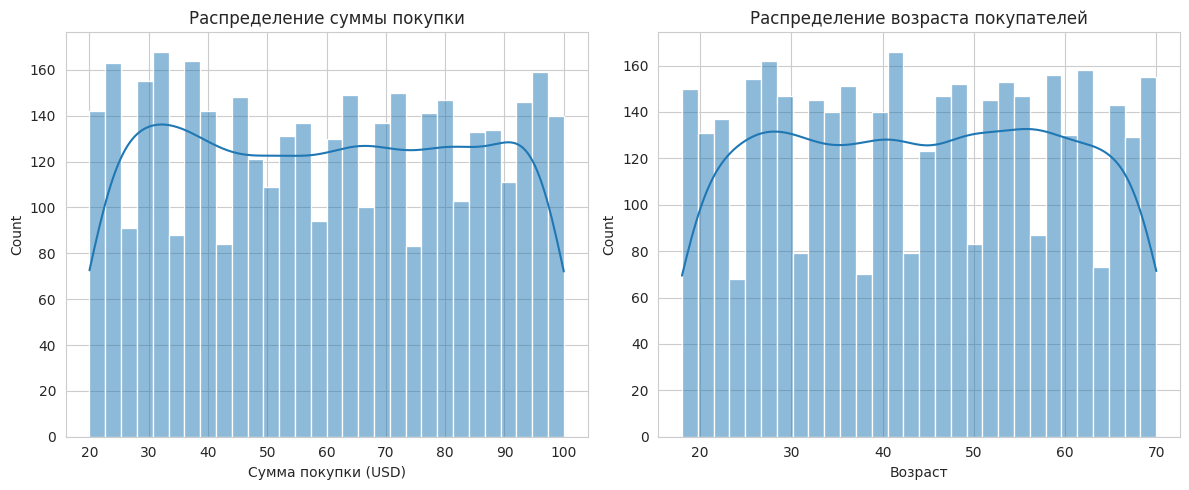

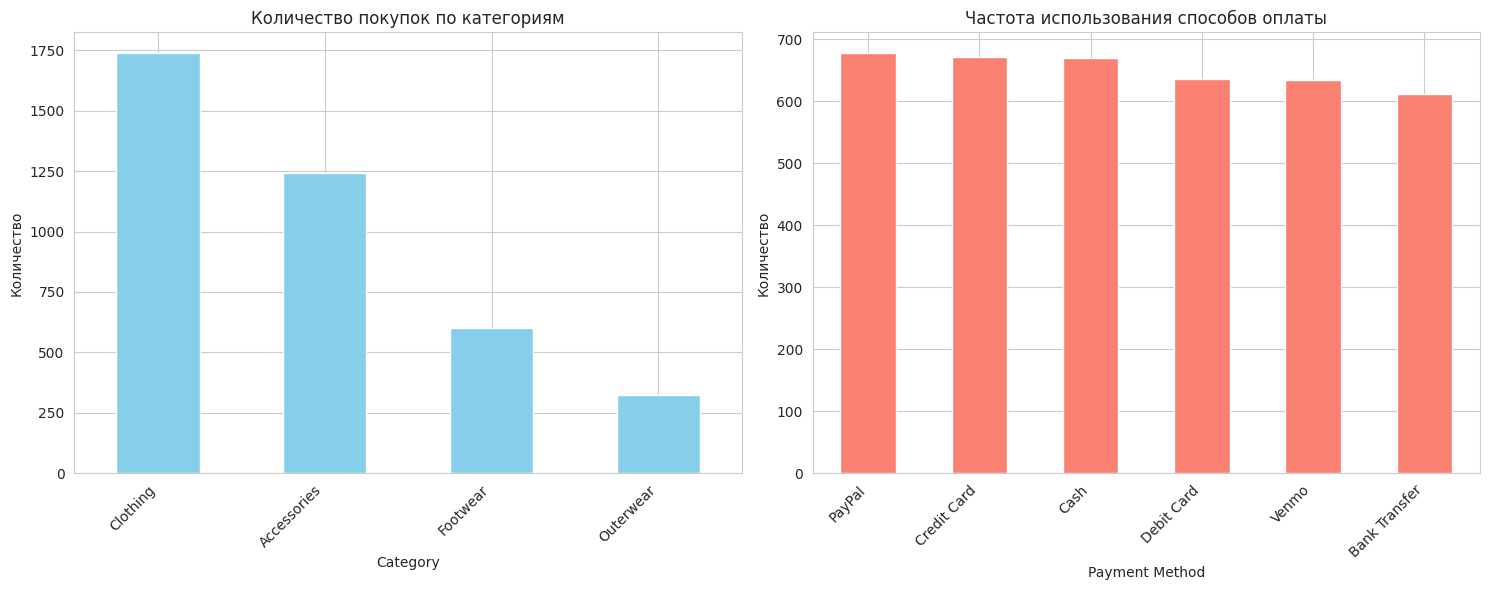

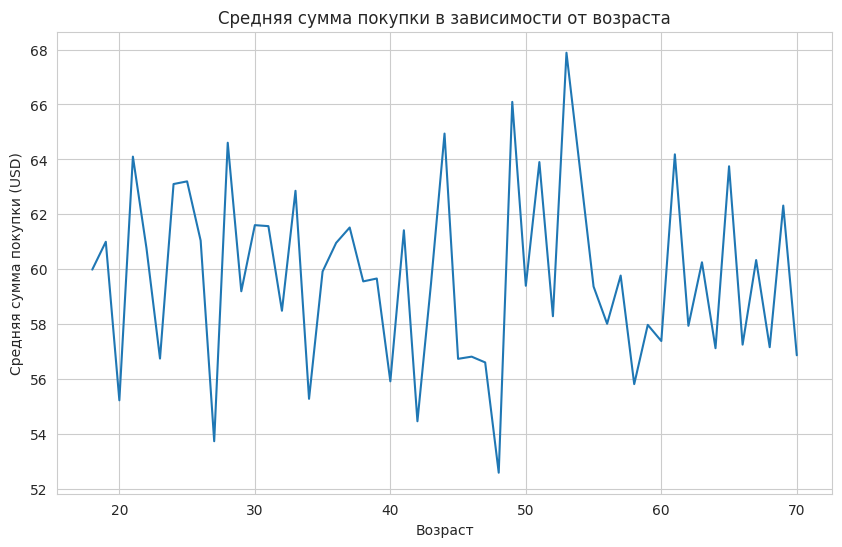

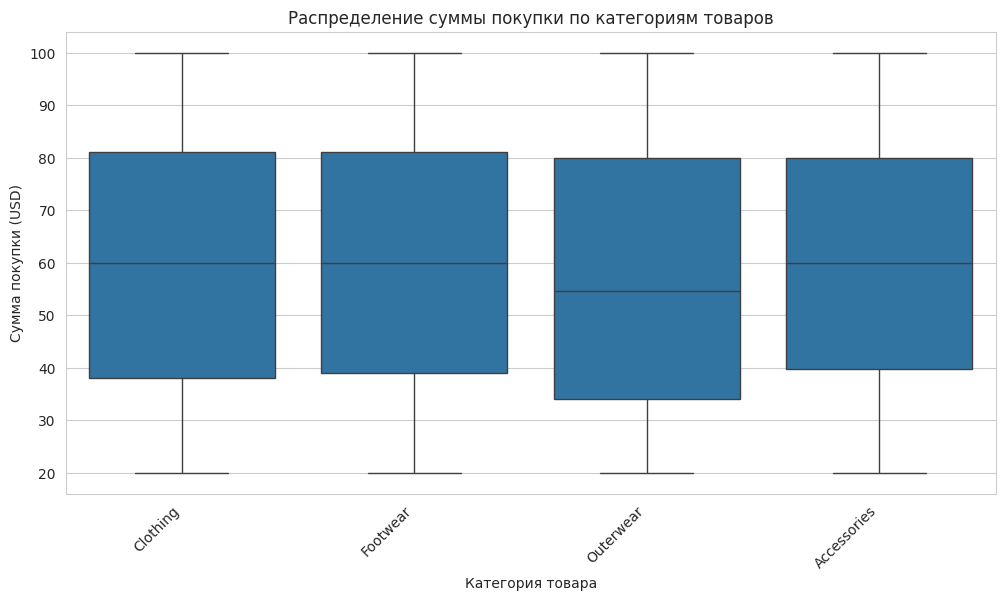

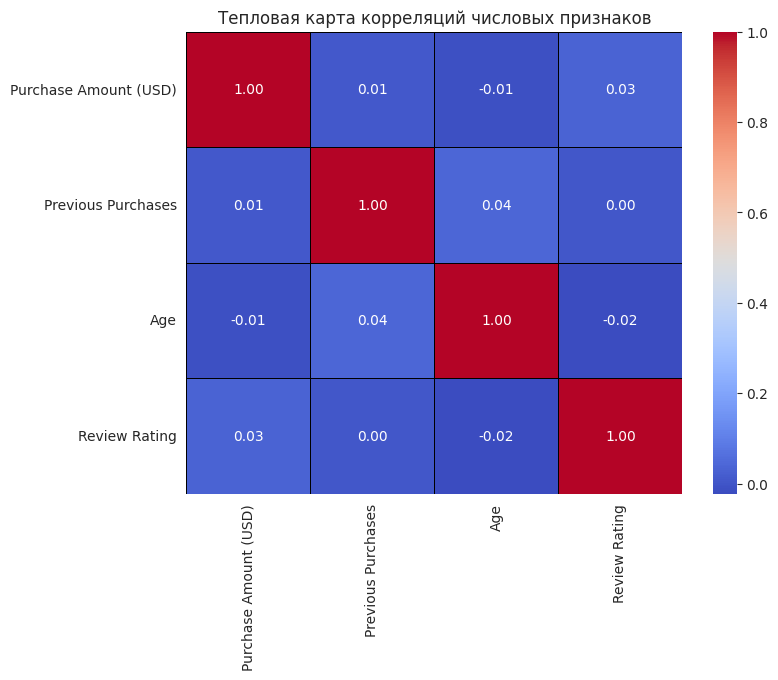

In [12]:

sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Purchase Amount (USD)'], kde=True, bins=30)
plt.title('Распределение суммы покупки')
plt.xlabel('Сумма покупки (USD)')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Распределение возраста покупателей')
plt.xlabel('Возраст')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Количество покупок по категориям')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
df['Payment Method'].value_counts().plot(kind='bar', color='salmon')
plt.title('Частота использования способов оплаты')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

avg_purchase_by_age = df.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_purchase_by_age, x='Age', y='Purchase Amount (USD)')
plt.title('Средняя сумма покупки в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Средняя сумма покупки (USD)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Распределение суммы покупки по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Сумма покупки (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Тепловая карта корреляций числовых признаков')
plt.show()

In [15]:
purchase_stats = df.groupby(['Gender', 'Category']).agg(
    Avg_Purchase=('Purchase Amount (USD)', 'mean'),
    Median_Purchase=('Purchase Amount (USD)', 'median'),
    Avg_Rating=('Review Rating', 'mean'),
    Total_Count=('Customer ID', 'count')
).round(2).reset_index()

print(purchase_stats.head(10))

payment_counts = df.groupby('Payment Method')['Customer ID'].count().sort_values(ascending=False)

print(payment_counts)
pivot_table = df.pivot_table(
    index='Season',
    columns='Size',
    values='Purchase Amount (USD)',
    aggfunc='mean',
    fill_value=0
).round(2)

print(pivot_table)

   Gender     Category  Avg_Purchase  Median_Purchase  Avg_Rating  Total_Count
0  Female  Accessories         60.76             61.0        3.76          392
1  Female     Clothing         60.50             60.0        3.70          556
2  Female     Footwear         59.47             58.0        3.82          199
3  Female    Outerwear         58.43             57.0        3.73          101
4    Male  Accessories         59.41             59.0        3.77          848
5    Male     Clothing         59.80             60.0        3.73         1181
6    Male     Footwear         60.64             60.5        3.78          400
7    Male    Outerwear         56.61             53.0        3.75          223
Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Customer ID, dtype: int64
Size        L      M      S     XL
Season                            
Fall    61.45  60.47  62.10  65.51
Spring  56.